<a href="https://colab.research.google.com/github/Walls182/API_ADOPTAPATAS_3/blob/master/Perceptron_Interfaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

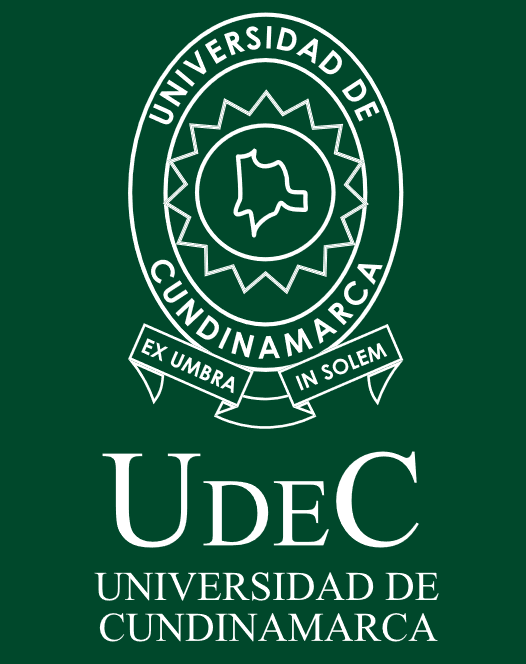
# Universidad de Cundinamarca, Inteligencia Artificial
## Integrantes:
Karen Dayana Duarte Fandiño

Walter Alejandro Salazar Castro

### Nota: Ejecutar con Ctrl enter
###Seleccionar los archivos de texto, Escribir los errores iniciales y el alfa, después clic al boton entrenar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, clear_output


# Variables

alfa = 0
errT = 0
yo = [0, 0, 0, 0]
yd = []
w = []
net = 0
epoca = 0
err = []
errAcumulado = []
x = []

# -----Función para seleccionar el archivo de texto con las entradas----

def seleccionar_archivo_entrada(button):
    global x
    uploaded = files.upload()
    for file_name in uploaded.keys():
        x = np.loadtxt(file_name)
    print("Archivo de entradas cargado.")

#-----Función para seleccionar el archivo de texto con los pesos---

def seleccionar_archivo_pesos(button):
    global w
    uploaded = files.upload()
    for file_name in uploaded.keys():
        w = np.loadtxt(file_name)
    print("Archivo de pesos cargado.")

#-----Función para seleccionar archivo de texto con las salidas deseadas---

def seleccionar_archivo_salida(button):
    global yd
    uploaded = files.upload()
    for file_name in uploaded.keys():
        yd = np.loadtxt(file_name)
    print("Archivo de salidas cargado.")

#----Función de entrenamiento de la red----

def entrenar_red_neuronal(button):
    global alfa, err, yo, w, net, epoca, errAcumulado, errT

    # ---Carga de las variables---

    err = np.array([float(e) for e in error_input.value.split(',')])
    alfa = float(alpha_input.value)

    # ---Tamaño de la gráfica---

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # ----Ciclo de entrenamiento, para en error 0----

    while not np.all(err == 0):
        for p in range(4):
            net = sum(w[i] * x[i, p] for i in range(3))

            yo[p] = 1 if net > 0 else 0
            net = 0

            err[p] = yd[p] - yo[p]
            if err[p] != 0:
                for i in range(3):
                    w[i] += alfa * err[p] * x[i, p]

        epoca += 1
        errT += err[p]
        errAcumulado.append(sum(abs(err)))

    # ---Gráfica de la línea de clasificación---

    for i in np.arange(-2, 2, 0.01):  # Ampliar el rango de -2 a 2 en x
        x2 = (-(w[1] / w[2]) * (i)) - (w[0] / w[2])
        axs[0].plot(i, x2, 'g.')

    # ---Gráfica de puntos---
    for p in range(4):
        color = 'ro' if yd[p] == 1 else 'bo'  # Rojo si yd[p] es 1, azul si es 0
        axs[0].plot(x[1, p], x[2, p], color)

    # ---Ajusta los límites----

    axs[0].set_xlim(-2, 2)
    axs[0].set_ylim(-2, 2)

    # ---Gráfica de error acumulado -- Epoca vs Error---

    axs[1].plot(errAcumulado)
    axs[1].set_xlabel('Epoca')
    axs[1].set_ylabel('Error')

    plt.show()

    # ---Mostrar valores finales------
    with output:
        clear_output(wait=True)
        print(f"x: {x}")
        print(f"yd: {yd}")
        print(f"yo: {yo}")
        print(f"w: {w}")
        print(f"alfa: {alfa}")
        print(f"epoca: {epoca}")

    # ---Generar archivo de texto con los resultados----
    generar_archivo_resultados()

# ----Función para generar archivo de texto----

# ----Función para generar archivo de texto----
def generar_archivo_resultados():
    # Ecuación de la recta de clasificación
    recta_solucion = f"x2 = -({w[1]} / {w[2]}) * x1 - ({w[0]} / {w[2]})"

    resultado = f"""
    Resultados del entrenamiento de la red neuronal:

    Matriz de entrada (x):
    {x}

    Salidas deseadas (yd):
    {yd}

    Salidas obtenidas (yo):
    {yo}

    Pesos finales (w):
    {w}

    Valor de alfa:
    {alfa}

    Número de épocas:
    {epoca}

    Error acumulado en cada época:
    {errAcumulado}

    Recta de clasificación (solución):
    {recta_solucion}
    """

    # Escribir los resultados en el archivo de texto
    with open("resultados_entrenamiento.txt", "w") as file:
        file.write(resultado)

    # Descargar el archivo de texto con los resultados
    files.download("resultados_entrenamiento.txt")
    print("Archivo de resultados generado y descargado.")

# ---Interfaz gráfica-----

button_cargar_entrada = widgets.Button(description="Archivo de Entradas")
button_cargar_pesos = widgets.Button(description="Archivo de Pesos")
button_cargar_salida = widgets.Button(description="Archivo de Salidas")
button_entrenar = widgets.Button(description="Entrenamiento")

error_input = widgets.Text(
    value='0,0,0,0',
    description='Errores:',
    placeholder='Ingresa los errores deseados, separados por comas'
)

alpha_input = widgets.Text(
    value='0.1',
    description='Alfa:',
    placeholder='Ingresa el valor de alfa'
)

output = widgets.Output()

# ---Botones---
button_cargar_entrada.on_click(seleccionar_archivo_entrada)
button_cargar_pesos.on_click(seleccionar_archivo_pesos)
button_cargar_salida.on_click(seleccionar_archivo_salida)
button_entrenar.on_click(entrenar_red_neuronal)

# ---Muestra de resultados---

display(button_cargar_entrada, button_cargar_pesos, button_cargar_salida)
display(error_input, alpha_input)
display(button_entrenar)
display(output)

